*Dear TAs, I added the class late, and Josh said it was cool to submit the assignments late (3 weeks) without penalty. Thank you for your help and for your time! --Ashley *
Author: Ashley Koo

Uni: hk2827

Class: Applied Deep Learning

### 1. Collect a dataset of at least three landmarks. Your dataset should include at least 100 images of each in train, 50 in validation, and 25 in test (using more images is fine). You can randomly shuffle your dataset to create these splits.

I decided to take 100 images for training set, 60 for validation set, and 30 for testing set. There are 3 classes in total, each representing a New York City landmark. The three classes are = {Brooklyn Bridge, Bryant park, Lincoln Center}, 240 images for each class, there were a total of 570 images assembled for this classification problem. 300 for training stage, 180 for validation stage, and 90 for testing stage. 


### 2. Write a model to classify your dataset using transfer learning. Run an experiment and report your results. What do you find?

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Based on the previous part, I will use InceptionV3 as the pre-trained model (on ImageNet) to do transfer learning on the classification problem. Much of the code will be borrowed from part 1, as the instruction also suggests.

In [0]:
# Import statements
import matplotlib.pyplot as plt
import numpy as np 
import os

import tensorflow as tf 
import zipfile

from tensorflow.keras.applications import InceptionV3, MobileNetV2
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Initialize helpful directory paths 
base_dir = '/content/gdrive/My Drive/landmarks'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

train_1_dir = os.path.join(train_dir, 'brooklyn bridge')
train_2_dir = os.path.join(train_dir, 'bryant park')
train_3_dir = os.path.join(train_dir, 'lincoln center')

validation_1_dir = os.path.join(validation_dir, 'brooklyn bridge')
validation_2_dir = os.path.join(validation_dir, 'bryant park')
validation_3_dir = os.path.join(validation_dir, 'lincoln center')

test_1_dir = os.path.join(test_dir, 'brooklyn bridge')
test_2_dir = os.path.join(test_dir, 'bryant park')
test_3_dir = os.path.join(test_dir, 'lincoln center')

# Get total number of train + val images
num_1_tr = len(os.listdir(train_1_dir))
num_2_tr = len(os.listdir(train_2_dir))
num_3_tr = len(os.listdir(train_3_dir))

num_1_val = len(os.listdir(validation_1_dir))
num_2_val = len(os.listdir(validation_2_dir))
num_3_val = len(os.listdir(validation_3_dir))

num_1_test = len(os.listdir(test_1_dir))
num_2_test = len(os.listdir(test_2_dir))
num_3_test = len(os.listdir(test_3_dir))

total_train = num_1_tr + num_2_tr + num_3_tr
total_val = num_1_val + num_2_val + num_3_val
total_test = num_1_test + num_2_test + num_3_test

# Resize input images to consistent shape
TARGET_SHAPE = 150
BATCH_SIZE = 32

# Data augmentation 
image_gen_train = ImageDataGenerator(
                    rescale=1./255, 
                    rotation_range=45, 
                    width_shift_range=.15, 
                    height_shift_range=.15, 
                    horizontal_flip=True, 
                    zoom_range=0.5)

# Using ImageDataGenerator 
image_gen_val = ImageDataGenerator(rescale=1./255)

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE, # for 32 images  
                                               directory=train_dir, # from the train_dir 
                                               shuffle=True, # shuffles the training data
                                               target_size=(TARGET_SHAPE, TARGET_SHAPE),
                                               class_mode='sparse' # 1D array of integer labels
                                                           )

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE, 
                                                              directory=validation_dir, 
                                                              target_size=(TARGET_SHAPE, TARGET_SHAPE),
                                                              class_mode='sparse')

test_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE, 
                                                              directory=test_dir, 
                                                              target_size=(TARGET_SHAPE, TARGET_SHAPE),
                                                              class_mode='sparse')




Found 296 images belonging to 3 classes.
Found 172 images belonging to 3 classes.
Found 91 images belonging to 3 classes.


In [0]:
# Trial 1
# Using "Transfer Learning" to build model -- taking second approach of extending the model 
# Import the pre-trained model InceptionV3
conv_base = InceptionV3(weights='imagenet',include_top=False, input_shape=(150, 150, 3))

# Add another layel to ResNet50 like we did for VGG16
model = Sequential()
model.add(conv_base)
model.add(Flatten()) 
model.add(Dense(512, activation='relu')) 
model.add(Dense(3, activation='softmax')) 

# Avoid messing up the good pre-trained model
conv_base.trainable = False

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

# Train the model 
EPOCHS = 10
history = model.fit_generator(
      train_data_gen,
      steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
      epochs=EPOCHS,
      validation_data=val_data_gen,
      validation_steps=int(np.ceil(total_val / float(BATCH_SIZE))),
      verbose=2)


Epoch 1/10
6/6 [==============================] - 9s 1s/step - loss: 10.3816 - acc: 0.3488
 - 14s - loss: 9.5470 - acc: 0.3074 - val_loss: 10.3816 - val_acc: 0.3488
Epoch 2/10
6/6 [==============================] - 7s 1s/step - loss: 10.3816 - acc: 0.3488
 - 17s - loss: 10.6827 - acc: 0.3345 - val_loss: 10.3816 - val_acc: 0.3488
Epoch 3/10
6/6 [==============================] - 7s 1s/step - loss: 10.6614 - acc: 0.3488
 - 17s - loss: 10.9574 - acc: 0.3345 - val_loss: 10.6614 - val_acc: 0.3488
Epoch 4/10
6/6 [==============================] - 7s 1s/step - loss: 10.5215 - acc: 0.3488
 - 17s - loss: 10.6827 - acc: 0.3345 - val_loss: 10.5215 - val_acc: 0.3488
Epoch 5/10
6/6 [==============================] - 7s 1s/step - loss: 10.2417 - acc: 0.3488
 - 16s - loss: 10.6827 - acc: 0.3345 - val_loss: 10.2417 - val_acc: 0.3488
Epoch 6/10
6/6 [==============================] - 7s 1s/step - loss: 10.3816 - acc: 0.3488
 - 16s - loss: 10.9574 - acc: 0.3345 - val_loss: 10.3816 - val_acc: 0.3488
Epoch

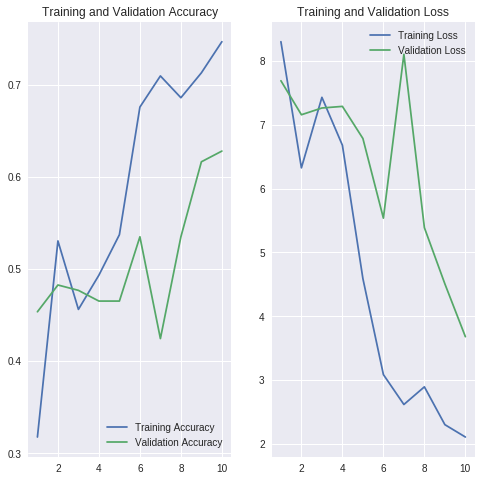

In [0]:
# Plot acc, loss
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, EPOCHS+1)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Results: Training accuracy reached 0.75 whereas validation accuracy staggered at around 0.63. Despite data augmentation applied on the training set, overfitting occurs and validation accuracy frequently dips (accuracy) or spikes (loss). Even so, I expect that transfer learning is especiallly useful here because of the small landmark dataset that I collected. Choosing InceptionV3, or perhaps the number of nodes in the last dense layer, might have been poor choices and so we move onto the next part where we fine-tune the architecture! 


### 3. Next, how small of a model (in terms of the number of parameters) can you write to classify these images reasonably well? Explore the available pretrained  models , and see if any are suitable. Run an experiment and report your results.


Here are four additional combinations of convolutional layer configurations and max pooling layer configurations that were applied. First I changed the number of nodes in the dense layer to vary from 512 (original), to 128 and 64. I expect smaller dense layers to match the dataset better, since the accuracy was poor (under 0.8) compared to the mini_flowers dataset.  

In addition to InceptionV3, I tried MobileNetV2 convolutional base because apparently it is reputed to train quickly and I was curious to see how accuracy would fare under the model. 
To summarize the trials:

Trial 2
---
InceptionV3  
model = Sequential()  
model.add(conv_base)  
model.add(Flatten())   
model.add(Dense(128, activation='relu'))   
model.add(Dense(3, activation='softmax'))   

Trial 3
---
InceptionV3  
model = Sequential()  
model.add(conv_base)  
model.add(Flatten())   
model.add(Dense(64, activation='relu'))   
model.add(Dense(3, activation='softmax'))   

Trial 4
---
MobileNetV2  
model = Sequential()  
model.add(conv_base)  
model.add(Flatten())   
model.add(Dense(512, activation='relu'))  // if 64 < 512 acc. above.  
model.add(Dense(3, activation='softmax'))   

Trial 5
---
MobileNetV2  
model = Sequential()  
model.add(conv_base)  
model.add(Flatten())   
model.add(Dense(64, activation='relu'))   
model.add(Dense(3, activation='softmax'))   



Results:   

Not surprisingly, the lower the number of nodes in the dense layer, the higher the learning rates for both training and validation.  
When using MobileNetV3, there was much more overfitting given the same method of data augmentation. This might be caused by the comparatively less applicable features that are learned through MobileNetV2 compared to InceptionV3. Note also that MobileNetV2, unlike InceptionV3, sees a decrease in learning ability with n = 64 dense layers. 



In [0]:
# Trial 2
# Using "Transfer Learning" to build model -- taking second approach of extending the model 
# Import the pre-trained model InceptionV3
conv_base = InceptionV3(weights='imagenet',include_top=False, input_shape=(150, 150, 3))

# Add another layel to ResNet50 like we did for VGG16
model = Sequential()
model.add(conv_base)
model.add(Flatten()) 
model.add(Dense(128, activation='relu')) 
model.add(Dense(3, activation='softmax')) 

# Avoid messing up the good pre-trained model
conv_base.trainable = False

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

# Train the model 
EPOCHS = 10
history = model.fit_generator(
      train_data_gen,
      steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
      epochs=EPOCHS,
      validation_data=val_data_gen,
      validation_steps=int(np.ceil(total_val / float(BATCH_SIZE))),
      verbose=2)

Epoch 1/10
6/6 [==============================] - 8s 1s/step - loss: 7.9552 - acc: 0.3372
 - 13s - loss: 5.6547 - acc: 0.3851 - val_loss: 7.9552 - val_acc: 0.3372
Epoch 2/10
6/6 [==============================] - 7s 1s/step - loss: 3.3199 - acc: 0.5640
 - 16s - loss: 4.9495 - acc: 0.4865 - val_loss: 3.3199 - val_acc: 0.5640
Epoch 3/10
6/6 [==============================] - 7s 1s/step - loss: 2.4025 - acc: 0.6105
 - 16s - loss: 2.6266 - acc: 0.5676 - val_loss: 2.4025 - val_acc: 0.6105
Epoch 4/10
6/6 [==============================] - 7s 1s/step - loss: 5.9703 - acc: 0.4419
 - 16s - loss: 2.2121 - acc: 0.6318 - val_loss: 5.9703 - val_acc: 0.4419
Epoch 5/10
6/6 [==============================] - 7s 1s/step - loss: 4.8792 - acc: 0.5000
 - 16s - loss: 2.3200 - acc: 0.6588 - val_loss: 4.8792 - val_acc: 0.5000
Epoch 6/10
6/6 [==============================] - 7s 1s/step - loss: 3.2442 - acc: 0.6395
 - 16s - loss: 3.2872 - acc: 0.5439 - val_loss: 3.2442 - val_acc: 0.6395
Epoch 7/10
6/6 [======

In [0]:
# Trial 3
# Using "Transfer Learning" to build model -- taking second approach of extending the model 
# Import the pre-trained model InceptionV3
conv_base = InceptionV3(weights='imagenet',include_top=False, input_shape=(150, 150, 3))

# Add another layel to ResNet50 like we did for VGG16
model = Sequential()
model.add(conv_base)
model.add(Flatten()) 
model.add(Dense(64, activation='relu')) 
model.add(Dense(3, activation='softmax')) 

# Avoid messing up the good pre-trained model
conv_base.trainable = False

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

# Train the model 
EPOCHS = 10
history = model.fit_generator(
      train_data_gen,
      steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
      epochs=EPOCHS,
      validation_data=val_data_gen,
      validation_steps=int(np.ceil(total_val / float(BATCH_SIZE))),
      verbose=2)

Epoch 1/10
6/6 [==============================] - 9s 1s/step - loss: 4.0088 - acc: 0.3605
 - 13s - loss: 2.5659 - acc: 0.4122 - val_loss: 4.0088 - val_acc: 0.3605
Epoch 2/10
6/6 [==============================] - 7s 1s/step - loss: 1.2451 - acc: 0.5640
 - 16s - loss: 1.3095 - acc: 0.5608 - val_loss: 1.2451 - val_acc: 0.5640
Epoch 3/10
6/6 [==============================] - 7s 1s/step - loss: 1.1412 - acc: 0.5756
 - 16s - loss: 0.8475 - acc: 0.6554 - val_loss: 1.1412 - val_acc: 0.5756
Epoch 4/10
6/6 [==============================] - 7s 1s/step - loss: 1.0075 - acc: 0.6221
 - 16s - loss: 0.6730 - acc: 0.6959 - val_loss: 1.0075 - val_acc: 0.6221
Epoch 5/10
6/6 [==============================] - 7s 1s/step - loss: 1.3410 - acc: 0.5814
 - 16s - loss: 0.6550 - acc: 0.7365 - val_loss: 1.3410 - val_acc: 0.5814
Epoch 6/10
6/6 [==============================] - 7s 1s/step - loss: 1.0979 - acc: 0.6337
 - 16s - loss: 0.5493 - acc: 0.7905 - val_loss: 1.0979 - val_acc: 0.6337
Epoch 7/10
6/6 [======

In [0]:
# Plot acc, loss
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, EPOCHS+1)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Found 296 images belonging to 3 classes.
Found 172 images belonging to 3 classes.
Found 91 images belonging to 3 classes.
9412608/9406464 [==============================] - 1s 0us/step
Epoch 1/10
6/6 [==============================] - 8s 1s/step - loss: 2.5326 - acc: 0.6105
 - 12s - loss: 3.7141 - acc: 0.5372 - val_loss: 2.5326 - val_acc: 0.6105
Epoch 2/10
6/6 [==============================] - 7s 1s/step - loss: 3.4959 - acc: 0.6512
 - 16s - loss: 1.8866 - acc: 0.7568 - val_loss: 3.4959 - val_acc: 0.6512
Epoch 3/10
6/6 [==============================] - 7s 1s/step - loss: 2.9278 - acc: 0.6628
 - 16s - loss: 1.1505 - acc: 0.8176 - val_loss: 2.9278 - val_acc: 0.6628
Epoch 4/10
6/6 [==============================] - 7s 1s/step - loss: 2.7543 - acc: 0.6919
 - 16s - loss: 1.0468 - acc: 0.8412 - val_loss: 2.7543 - val_acc: 0.6919
Epoch 5/10
6/6 [==============================] - 7s 1s/step - loss: 2.8084 - acc: 0.7093
 - 16s - loss: 1.4563 - acc: 0.8277 - val_loss: 2.8084 - val_acc: 0.7093


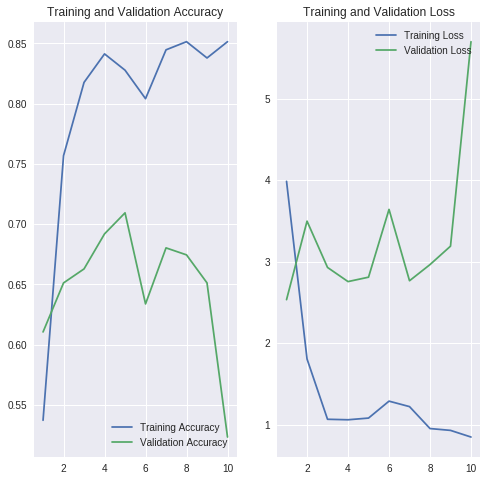

In [0]:
# Trial 4 - MobileNetV2
# Using "Transfer Learning" to build model -- taking second approach of extending the model
# Need to prepare data differently (160 X 160 instead of 150 X 150 pixels)
TARGET_SHAPE = 160
BATCH_SIZE = 32

# Data augmentation 
image_gen_train = ImageDataGenerator(
                    rescale=1./255, 
                    rotation_range=45, 
                    width_shift_range=.15, 
                    height_shift_range=.15, 
                    horizontal_flip=True, 
                    zoom_range=0.5)

# Using ImageDataGenerator 
image_gen_val = ImageDataGenerator(rescale=1./255)

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE, # for 32 images  
                                               directory=train_dir, # from the train_dir 
                                               shuffle=True, # shuffles the training data
                                               target_size=(TARGET_SHAPE, TARGET_SHAPE),
                                               class_mode='sparse' # 1D array of integer labels
                                                           )

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE, 
                                                              directory=validation_dir, 
                                                              target_size=(TARGET_SHAPE, TARGET_SHAPE),
                                                              class_mode='sparse')

test_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE, 
                                                              directory=test_dir, 
                                                              target_size=(TARGET_SHAPE, TARGET_SHAPE),
                                                              class_mode='sparse')


# Import the pre-trained model MobileNetV2
conv_base = MobileNetV2(weights='imagenet',include_top=False, input_shape=(160, 160, 3))

# Add another layel to ResNet50 like we did for VGG16
model = Sequential()
model.add(conv_base)
model.add(Flatten()) 
model.add(Dense(128, activation='relu')) 
model.add(Dense(3, activation='softmax')) 

# Avoid messing up the good pre-trained model
conv_base.trainable = False

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

# Train the model 
EPOCHS = 10
history = model.fit_generator(
      train_data_gen,
      steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
      epochs=EPOCHS,
      validation_data=val_data_gen,
      validation_steps=int(np.ceil(total_val / float(BATCH_SIZE))),
      verbose=2)

# Plot acc, loss
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, EPOCHS+1)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Epoch 1/10
6/6 [==============================] - 8s 1s/step - loss: 6.4185 - acc: 0.4419
 - 11s - loss: 6.5715 - acc: 0.4088 - val_loss: 6.4185 - val_acc: 0.4419
Epoch 2/10
6/6 [==============================] - 7s 1s/step - loss: 6.6072 - acc: 0.4535
 - 16s - loss: 5.6232 - acc: 0.5405 - val_loss: 6.6072 - val_acc: 0.4535
Epoch 3/10
6/6 [==============================] - 7s 1s/step - loss: 6.5375 - acc: 0.4767
 - 16s - loss: 5.7235 - acc: 0.5270 - val_loss: 6.5375 - val_acc: 0.4767
Epoch 4/10
6/6 [==============================] - 7s 1s/step - loss: 6.2073 - acc: 0.4767
 - 16s - loss: 5.8516 - acc: 0.5574 - val_loss: 6.2073 - val_acc: 0.4767
Epoch 5/10
6/6 [==============================] - 7s 1s/step - loss: 6.6648 - acc: 0.5058
 - 16s - loss: 5.7291 - acc: 0.5608 - val_loss: 6.6648 - val_acc: 0.5058
Epoch 6/10
6/6 [==============================] - 7s 1s/step - loss: 6.7108 - acc: 0.4535
 - 16s - loss: 5.8984 - acc: 0.5777 - val_loss: 6.7108 - val_acc: 0.4535
Epoch 7/10
6/6 [======

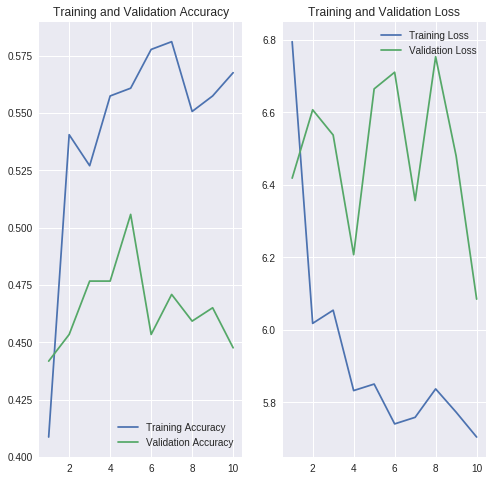

In [0]:
# Trial 5 - MobileNetV2

# Using "Transfer Learning" to build model -- taking second approach of extending the model 
# Import the pre-trained model MobileNetV2
conv_base = MobileNetV2(weights='imagenet',include_top=False, input_shape=(160, 160, 3))

# Add another layel to ResNet50 like we did for VGG16
model = Sequential()
model.add(conv_base)
model.add(Flatten()) 
model.add(Dense(64, activation='relu')) 
model.add(Dense(3, activation='softmax')) 

# Avoid messing up the good pre-trained model
conv_base.trainable = False

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

# Train the model 
EPOCHS = 10
history = model.fit_generator(
      train_data_gen,
      steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
      epochs=EPOCHS,
      validation_data=val_data_gen,
      validation_steps=int(np.ceil(total_val / float(BATCH_SIZE))),
      verbose=2)

# Plot acc, loss
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, EPOCHS+1)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
